In [ ]:
# ensemble laerning (wisdom of crowd)-
# voting
# bagging
# boosting
# stacking 

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [11]:
data=pd.read_csv('placement-dataset.csv')

In [12]:
data

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


In [4]:
data= data.sample(10,replace=True)            #row sampling 

In [5]:
data

,cgpa,iq,placement
58,8.0,79,1
89,4.9,151,0
7,5.0,63,0
56,6.1,65,0
46,5.3,114,0
88,4.4,149,0
31,3.9,109,0
38,6.5,160,1
85,5.8,166,1
75,4.8,169,0


In [6]:
data= data.sample(2,axis=1)              #column sampling(random space sampling)

In [7]:
data

,iq,placement
58,79,1
89,151,0
7,63,0
56,65,0
46,114,0
88,149,0
31,109,0
38,160,1
85,166,1
75,169,0


In [13]:
data.shape

(100, 3)

In [14]:
data.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [15]:
x= data[['cgpa','iq']]
x

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [16]:
y=data['placement']
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

In [21]:
dc=DecisionTreeClassifier()

In [22]:
dc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [23]:
dc.predict([[5.8,142]])

C:\Users\sc024\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
rf=RandomForestClassifier(5,max_depth=5,n_jobs=-1,verbose=True)

In [25]:
rf.fit(xtrain,ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=5, n_estimators=5, n_jobs=-1, verbose=True)

C:\Users\sc024\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


<Axes: >

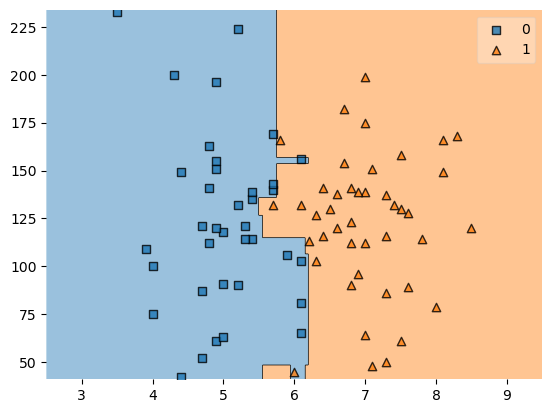

In [26]:
plot_decision_regions(xtrain.to_numpy(),ytrain.to_numpy(),clf=rf)